In [1]:
import sys
import os
import glob
import pickle
path_pipest = os.path.abspath('./')
n=0
while (not os.path.basename(path_pipest)=='pipest') and (n<4):
    path_pipest=os.path.dirname(path_pipest)
    n+=1 
if not os.path.basename(path_pipest)=='pipest':
    print("path_pipest not found. Instead: {}".format(path_pipest))
    raise ValueError("path_pipest not found.")
path_models=path_pipest+'/models'    
path_sdhawkes=path_pipest+'/sdhawkes'
path_modelling = path_sdhawkes+'/modelling'
path_resources = path_sdhawkes+'/resources'
path_impact=path_pipest+'/impact'
path_lobster=path_pipest+'/lobster'
path_lobster_data=path_lobster+'/data'
path_lobster_pyscripts=path_lobster+'/py_scripts'
path_tests = path_pipest+'/tests'
path_saved_tests = path_tests+'/saved_tests'
path_perfmeas=path_tests+'/performance_measurements'
sys.path.append(path_modelling)
sys.path.append(path_resources)
sys.path.append(path_perfmeas)
import numpy
import pandas
import matplotlib.pyplot as plt

In [2]:
symbol="INTC"
date="2019-01-23"
time_window="41400-45000"

In [3]:
with open(path_impact+"/models/{}/{}_{}_{}/{}_sdhawkes_{}_{}"
          .format(symbol, symbol, date, time_window, symbol, date, time_window), 'rb') as source:
    model=pickle.load(source)

openmp.omp_get_max_threads(): 4


In [4]:
for idx in model.archive:
    try:
        print(model.archive[idx]['liquidator'].termination_time)
        print(idx)
    except:
        pass
            

89.95926835576165
INTC_sdhawkes_2019-01-23_41400-45000_bm2
190.2355554832393
INTC_sdhawkes_2019-01-23_41400-45000_bm3
82.31322901207466
INTC_sdhawkes_2019-01-23_41400-45000_bm0
378.7976397557501
INTC_sdhawkes_2019-01-23_41400-45000_bm5
178.99076125779038
INTC_sdhawkes_2019-01-23_41400-45000_bm4
750.6981268130198
INTC_sdhawkes_2019-01-23_41400-45000_bm1


In [5]:
model.archive['INTC_sdhawkes_2019-01-23_41400-45000_bm2']

{'n_subitems': 6,
 'INTC_sdhawkes_2019-01-23_41400-45000_bm2': 'INTC_sdhawkes_2019-01-23_41400-45000_bm2',
 'liquidator': <model.Liquidator at 0x7f38bac553d0>,
 'simulated_times': array([-539.93874184, -539.93377978, -539.90336555, ..., 2437.36964941,
        2437.37517436, 2437.39445184]),
 'simulated_events': array([4, 2, 4, ..., 4, 4, 3]),
 'simulated_states': array([6, 6, 6, ..., 8, 8, 8]),
 'simulated_intensities': array([[-5.39938742e+02,  0.00000000e+00,  1.91548260e-01,
          1.85212279e-01,  1.13169542e+01,  8.71724709e+00],
        [-5.39933780e+02,  0.00000000e+00,  1.91548359e-01,
          1.85212377e-01,  1.13169543e+01,  2.55588341e+01],
        [-5.39903366e+02,  0.00000000e+00,  1.91548446e-01,
          7.78668564e-01,  1.13169543e+01,  1.61994639e+01],
        ...,
        [ 2.43736965e+03,  0.00000000e+00,  5.96831574e-01,
          3.39786659e-01,  4.05447054e+01,  2.36742842e+01],
        [ 2.43737517e+03,  0.00000000e+00,  5.84974068e-01,
          3.34747185

In [6]:
model.liquidator=model.archive['INTC_sdhawkes_2019-01-23_41400-45000_bm2']['liquidator']
model.simulated_times=model.archive['INTC_sdhawkes_2019-01-23_41400-45000_bm2']['simulated_times']
model.simulated_events=model.archive['INTC_sdhawkes_2019-01-23_41400-45000_bm2']['simulated_events']
model.simulated_states=model.archive['INTC_sdhawkes_2019-01-23_41400-45000_bm2']['simulated_states']
model.simulated_intensities=model.archive['INTC_sdhawkes_2019-01-23_41400-45000_bm2']['simulated_intensities']
model.store_2Dstates()

In [7]:
model.store_price_trajectory(type_of_input='simulated', initial_price=model.data.mid_price.iloc[0,1],
                             ticksize=model.data.ticksize)

In [8]:
model.liquidator.print_info()

liquidator.initial_inventory: 10.0
liquidator.type_of_liquid: with_the_market
liquidator.control_type: fraction_of_inventory
liquidator.control: 0.2
liquidator.start_time: 0.0
liquidator.termination_time: 89.95926835576165


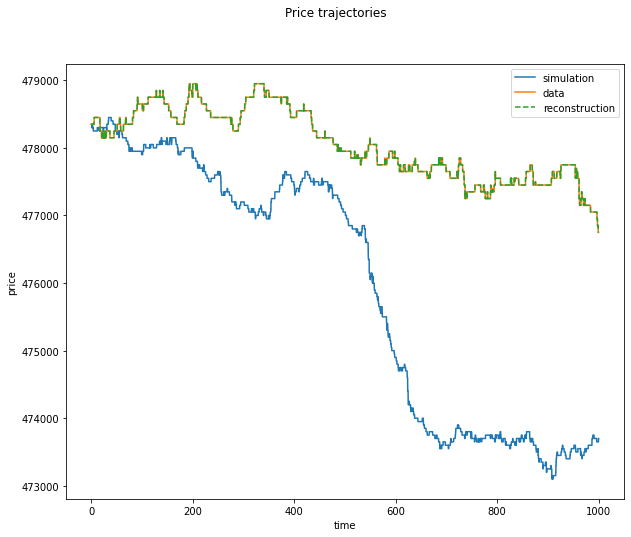

In [9]:
model.plot_price_trajectories(T=1000)

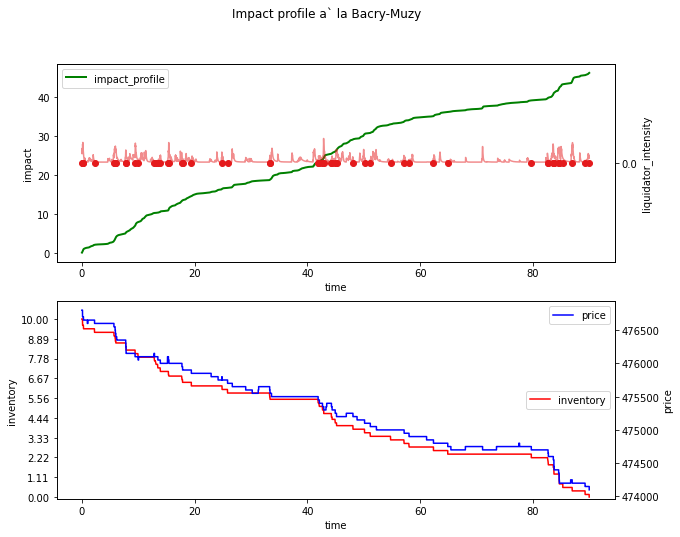

In [10]:
model.plot_bm_impact_profile()

In [11]:
model.liquidator=model.archive['INTC_sdhawkes_2019-01-23_41400-45000_bm1']['liquidator']
model.simulated_times=model.archive['INTC_sdhawkes_2019-01-23_41400-45000_bm1']['simulated_times']
model.simulated_events=model.archive['INTC_sdhawkes_2019-01-23_41400-45000_bm1']['simulated_events']
model.simulated_states=model.archive['INTC_sdhawkes_2019-01-23_41400-45000_bm1']['simulated_states']
model.simulated_intensities=model.archive['INTC_sdhawkes_2019-01-23_41400-45000_bm1']['simulated_intensities']
model.store_2Dstates()

In [12]:
model.store_price_trajectory(type_of_input='simulated', initial_price=model.data.mid_price.iloc[0,1],
                             ticksize=model.data.ticksize)

In [13]:
model.liquidator.print_info()

liquidator.initial_inventory: 10.0
liquidator.type_of_liquid: constant_intensity
liquidator.control_type: fraction_of_bid_side
liquidator.control: 0.2
liquidator.start_time: 0.0
liquidator.termination_time: 750.6981268130198


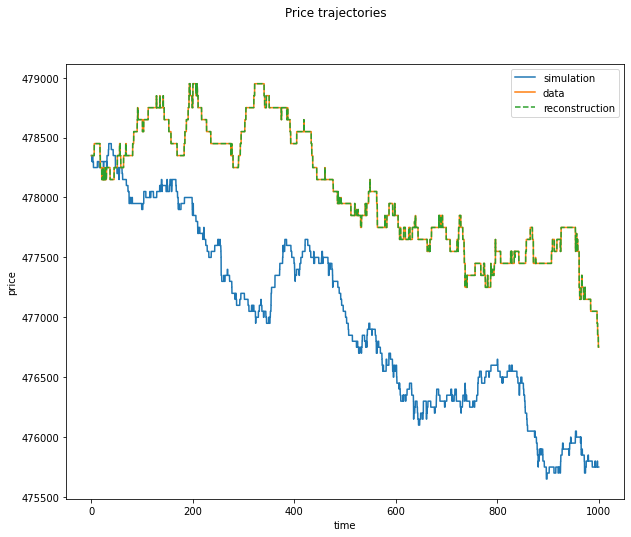

In [14]:
model.plot_price_trajectories(T=1000)

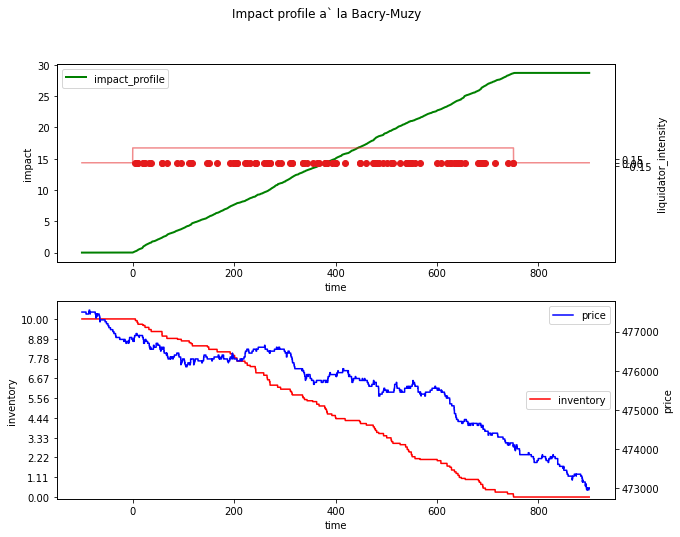

In [17]:
model.plot_bm_impact_profile(time_start=-100.0, time_end=900)